In [ ]:
!pip install ultralytics supervision -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 614.2/614.2 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 kB 6.6 MB/s eta 0:00:00


In [ ]:
!pip install gdown

In [ ]:
import gdown
gdown.download(id="127LmnnyzrsFNtYqpE9CKr-ntA6uEYIb6",output="model.pt")

In [ ]:
from ultralytics import YOLO
model=YOLO("model.pt")

In [ ]:
import supervision as sv

In [ ]:
sv.process_video("VID_20230903_192841.mp4","out.mp4",lambda a,_:model.predict(a)[0].plot())

In [ ]:
import cv2

In [ ]:
cap=cv2.VideoCapture("/content/VID_20230903_192620.mp4")

In [ ]:
cap.read()[-1]

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(im)

In [ ]:
result = model.predict(im)


0: 384x640 1 stove_on, 1 no_fire, 654.1ms
Speed: 2.9ms preprocess, 654.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


In [ ]:
from itertools import combinations
combi=list(combinations([i for i in result[0].boxes.data],2))

In [ ]:
im=cv2.VideoCapture("/content/VID_20230903_192620.mp4").read()[-1]
result=model.predict(im)


0: 384x640 2 no_fires, 1 stove_off, 450.7ms
Speed: 5.4ms preprocess, 450.7ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


In [ ]:
for p in result[0].boxes.data:
  p = np.array(p,dtype=int)
  cv2.rectangle(im,(p[0],p[1]),(p[2],p[3]),(0,0,255),4)

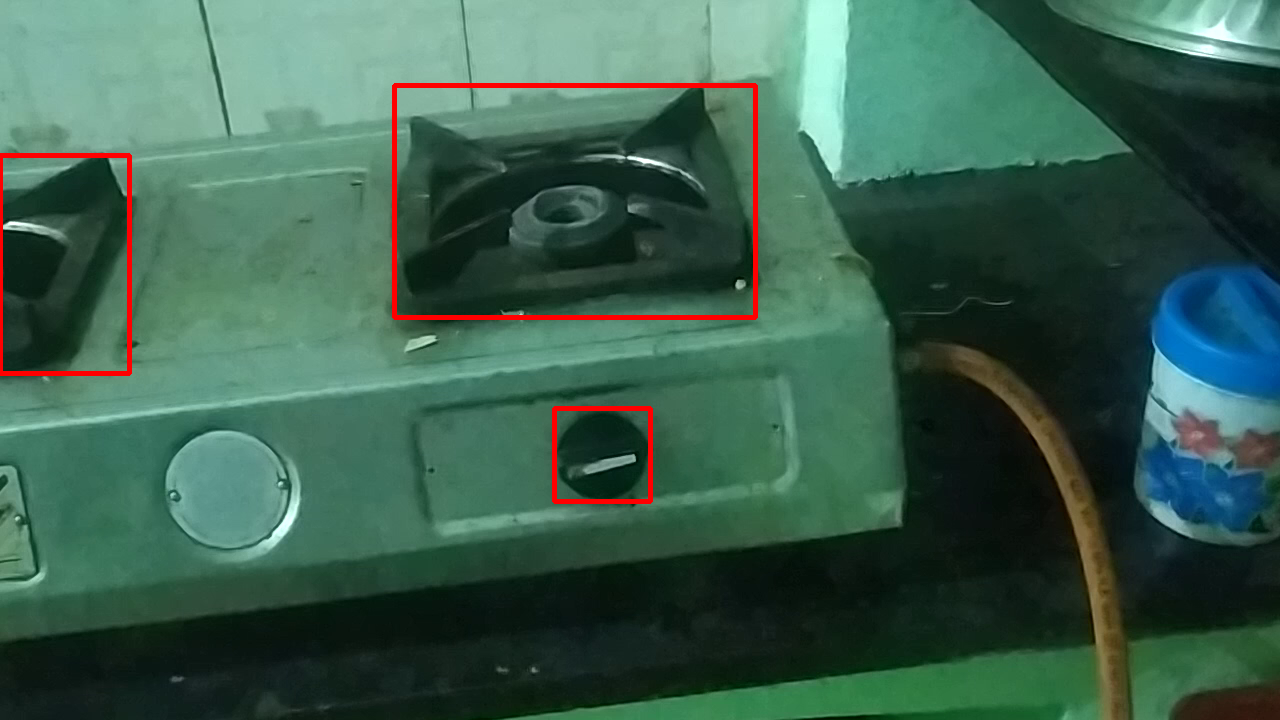

In [ ]:
cv2_imshow(im)

In [ ]:
import gdown

In [ ]:
!pip install cvzone

In [ ]:
model.names

{0: 'stove_on', 1: 'no_fire', 2: 'stove_off', 3: 'fire'}

In [ ]:
import time
s = time.time()
time.sleep(2)
time.time() - s

2.0022761821746826

In [ ]:
[1,1,1,0,0,1,1,0,1]

In [ ]:
input_list = [1, 1, 1, 0, 0, 1, 1, 0, 1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
result = []
sublist = [input_list[0]]

for i in range(1, len(input_list)):
    if input_list[i] == input_list[i - 1]:
        sublist.append(input_list[i])
    else:
        result.append(sublist)
        sublist = [input_list[i]]

result.append(sublist)  # Append the last sublist
print(result)


[[1, 1, 1], [0, 0], [1, 1], [0], [1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]


In [ ]:
[li for li in result if len(li)>8]

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]

In [ ]:
9.0001%3<0.1

True

In [ ]:
def return_result(input_list):
  result = []
  sublist = [input_list[0]]

  for i in range(1, len(input_list)):
      if input_list[i] == input_list[i - 1]:
          sublist.append(input_list[i])
      else:
          result.append(sublist)
          sublist = [input_list[i]]

  result.append(sublist)
  final_li = result
  if final_li:
    result_str = f"safe percentage {len(final_li[-1][:120])/120:.2f}" if final_li[-1][0] == 0 else f"Danger percentage {len(final_li[-1][:120])/120:.2f}"
  return result_str


In [ ]:
return_result(list( 1 for _ in range(5000)))

'Danger percentage 1.00'

In [ ]:
f"{0.22222:.2f}"

'0.22'

In [ ]:
import cv2
import cvzone
from itertools import combinations
from google.colab.patches import cv2_imshow
import numpy as np
danger_or_not_list = []
def process(im,_):
  result = model.predict(im,verbose  = False )
  combi=list(combinations([i for i in result[0].boxes.data],2))
  temp = False
  for p1,p2 in combi:
    p1=np.array(p1,dtype=int)

    p2=np.array(p2,dtype=int)
    lab = [p1[-1] , p2[-1]]
    if p1[-1] != p2[-1] and abs(p2[0]-p1[0])<300 and (0 in lab) and (1 in lab):
      for p in [p1,p2]:
        temp=True
        x,y = (p[0],p[1])
        x2,y2 = (p[2],p[3])
        w,h = x2-x,y2-y
        cvzone.cornerRect(im,(x,y,w,h),colorR=[50,59,237],colorC=[0,0,255])
      p1,p2 = (p2,p1) if p1[1]>p2[1] else (p1,p2)


      # cv2.rectangle(im,(p1[0]-10,p1[1]-10),(max(p1[2:4],p2[2:4],key=lambda a:a[0])[0]+10,p2[3]+10),(0,0,255),thickness=4)
      # cv2.putText(im,"Danger Zone",(p1[0]-10,p1[1]-15),cv2.FONT_HERSHEY_COMPLEX,1.5,(0,0,255),3)

      x,y = (p1[0]-10,p1[1]-10)
      x2,y2 = (max(p1[2:4],p2[2:4],key=lambda a:a[0])[0]+10,p2[3]+10)
      w,h = x2-x,y2-y
      cvzone.cornerRect(im,(x,y,w,h),colorR=[50,59,237],colorC=[0,0,255])
      cvzone.putTextRect(im,"Stove on and no fire detected",( p1[0],p1[1]-45 ),colorT=(0,0,255),scale=2,thickness=2,offset=5)
      cvzone.putTextRect(im,"Danger Zone",(p1[0],p1[1]-20),colorT=(0,0,255),scale=2,thickness=2,offset=5)
      danger_or_not_list.append(1)
    if not temp and len(set(lab))>1 and abs(p2[0]-p1[0])<300:
      for p in [p1,p2]:
        # cv2.rectangle(im,(p[0],p[1]),(p[2],p[3]),[106, 237, 40][::-1],thickness=4)
        cvzone.cornerRect(im,(p[0],p[1],p[2] - p[0],p[3] - p[1]),colorR=[40,237,106],colorC=[0,255,0])
      p1,p2 = (p2,p1) if p1[1]>p2[1] else (p1,p2)

      x,y = (p1[0]-10,p1[1]-10)
      x2,y2 = (max(p1[2:4],p2[2:4],key=lambda a:a[0])[0]+10,p2[3]+10)
      w,h = x2-x,y2-y
      cvzone.cornerRect(im,(x,y,w,h),colorR=[40,237,106],colorC=[0,255,0])
      on_off = "on" if 3 in lab else "off"
      fire_or_not = "fire detected" if on_off=="on" else "no fire detected"
      cvzone.putTextRect(im,f"Stove {on_off} and {fire_or_not}",( p1[0],p1[1]-45 ),colorT=(0,255,0),scale=2,thickness=2,offset=5)
      cvzone.putTextRect(im,"Every Thing Fine",(p1[0],p1[1]-20),colorT=(0,255,0),scale=2,thickness=2,offset=5)
      danger_or_not_list.append(0)
  danger_per = return_result(danger_or_not_list)
  cvzone.putTextRect(im,danger_per,(30,30),scale=2,thickness=2,offset=4)
  return im
sv.process_video("/content/input_video.mp4","out.mp4",process)
# cv2_imshow(process(cv2.VideoCapture("/content/VID_20230903_192746.mp4").read()[-1],""))

In [ ]:
cv2.VideoCapture

In [ ]:
cv2_imshow(cv2.VideoCapture("/content/out.mp4").read()[-1])

In [ ]:
desired_fps = 30  # Change this to your desired lower FPS
cap=cv2.VideoCapture("VID_20230903_192620.mp4")
# Create an output video writer
output_video_path = 'out_video.mp4'
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))
out = cv2.VideoWriter(output_video_path, fourcc, desired_fps, (frame_width, frame_height))
for _ in range(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))):
  suc,im=cap.read()
  if suc:
    frame = process(im,"")
    out.write(frame)
out.release()

In [ ]:
!npm install localtunnel

In [ ]:
!pip install streamlit

In [ ]:
!streamlit run temp_file.py --server.port 8501 & npx localtunnel -p 8501

[#######...........] \ extract:localtunnel: verb lock using /root/.npm/_locks/s

npx: installed 22 in 2.369s

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://35.245.7.73:8501

your url is: https://little-chefs-trade.loca.lt
2023-09-10 15:04:59.764 Uncaught app exception
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/streamlit/runtime/memory_media_file_storage.py", line 164, in _read_file
    with open(filename, "rb") as f:
FileNotFoundError: [Errno 2] No such file or directory: 'fire_cut.mp'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/streamlit/runtime/scriptrunner/script_runner.py", line 552, in _run_script
    exec(code, module.__dict__)
  File "/content/temp_file.py", line 9, in <module>
    st.video(output_video_path, start_time=0)
  File "/usr/local/lib/python3.10/dist

In [ ]:
import requests

def get_public_ip():
    try:
        response = requests.get("https://httpbin.org/ip")
        if response.status_code == 200:
            data = response.json()
            return data.get("origin")
        else:
            return "Error: Unable to retrieve IP address."
    except requests.exceptions.RequestException as e:
        return f"Error: {e}"

public_ip = get_public_ip()
print(f"Public IP Address: {public_ip}")

Public IP Address: 35.245.7.73
